In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

np.__version__, pd.__version__, sns.__version__

('1.19.5', '1.2.4', '0.11.1')

In [2]:
df1 = pd.DataFrame({'name': ['Bob', 'Lisa', 'Sue'], 'pulse': [70, 63, 81]})
df2 = pd.DataFrame({'name': ['Eric', 'Bob', 'Marc'], 'weight': [60, 100, 70]})

In [3]:
df1

,name,pulse
0,Bob,70
1,Lisa,63
2,Sue,81


In [4]:
df2

,name,weight
0,Eric,60
1,Bob,100
2,Marc,70


In [5]:
pd.merge(df1, df2, how='inner') # default behavior

,name,pulse,weight
0,Bob,70,100


In [6]:
df1 = pd.DataFrame({'name': ['Bob', 'Lisa', 'Sue'], 'pulse': [70, 63, 81]})
df2 = pd.DataFrame({'name': ['Eric', 'Bob', 'Marc'], 'weight': [60, 100, 70]})

In [7]:
pd.merge(df1, df2, how='left')

,name,pulse,weight
0,Bob,70,100.0
1,Lisa,63,NaN
2,Sue,81,NaN


In [8]:
pd.merge(df1, df2, how='right')

,name,pulse,weight
0,Eric,NaN,60
1,Bob,70.0,100
2,Marc,NaN,70


In [9]:
pd.merge(df1, df2, how='outer')

,name,pulse,weight
0,Bob,70.0,100.0
1,Lisa,63.0,NaN
2,Sue,81.0,NaN
3,Eric,NaN,60.0
4,Marc,NaN,70.0


In [10]:
df1, df2

(   name  pulse
 0   Bob     70
 1  Lisa     63
 2   Sue     81,    name  weight
 0  Eric      60
 1   Bob     100
 2  Marc      70)

In [11]:
pd.merge(df1, df2, how='cross')

,name_x,pulse,name_y,weight
0,Bob,70,Eric,60
1,Bob,70,Bob,100
2,Bob,70,Marc,70
3,Lisa,63,Eric,60
4,Lisa,63,Bob,100
5,Lisa,63,Marc,70
6,Sue,81,Eric,60
7,Sue,81,Bob,100
8,Sue,81,Marc,70


In [12]:
pulse = pd.DataFrame({'name': ['Bob', 'Lisa', 'Sue'], 'p': [70, 63, 81]}) 
power = pd.DataFrame({'name': ['Bob', 'Lisa', 'Sue'], 'p': [60, 100, 70]})
print(pulse)
print(power)
pd.merge(pulse, power, on='name')

   name   p
0   Bob  70
1  Lisa  63
2   Sue  81
   name    p
0   Bob   60
1  Lisa  100
2   Sue   70


,name,p_x,p_y
0,Bob,70,60
1,Lisa,63,100
2,Sue,81,70


In [13]:
pulse = pd.DataFrame({'name': ['Bob', 'Lisa', 'Sue'], 'p': [70, 63, 81]})
power = pd.DataFrame({'name': ['Bob', 'Lisa', 'Sue'], 'p': [60, 100, 70]})
print(pulse)
print(power)
pd.merge(pulse, power, on='name', suffixes=['pulse', 'power'])

   name   p
0   Bob  70
1  Lisa  63
2   Sue  81
   name    p
0   Bob   60
1  Lisa  100
2   Sue   70


,name,ppulse,ppower
0,Bob,70,60
1,Lisa,63,100
2,Sue,81,70


In [14]:
df1 = pd.DataFrame({'name': ['Bob', 'Lisa', 'Sue'], 'pulse': [70, 63, 81]}, index=[123, 354, 165])
df2 = pd.DataFrame({'name': ['Eric', 'Bob', 'Marc'], 'weight': [60, 100, 70]}, index=[654, 123, 664])
df1.reset_index().merge(df2, how='left').set_index('index')

,name,pulse,weight
index,,,
123,Bob,70,100.0
354,Lisa,63,NaN
165,Sue,81,NaN


Merge:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge_asof.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge_ordered.html

Groupby:
- https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

Splitting:
- https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#splitting-an-object-into-groups

Sort:
- https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby-sorting

Convert:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.convert_dtypes.html

In [15]:
d = pd.DataFrame({'key': list('ABCABC'), 'val': range(6)})
d

,key,val
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [16]:
g = d.groupby('key')
g

In [17]:
g.size()

key
A    2
B    2
C    2
dtype: int64

In [18]:
g.sum()

,val
key,
A,3
B,5
C,7


In [19]:
ti = sns.load_dataset('titanic')
bin_group = pd.cut(ti.loc[:,'age'], [0, 18, 50, 100])
print(type(bin_group))
bin_group

<class 'pandas.core.series.Series'>


0      (18.0, 50.0]
1      (18.0, 50.0]
2      (18.0, 50.0]
3      (18.0, 50.0]
4      (18.0, 50.0]
           ...     
886    (18.0, 50.0]
887    (18.0, 50.0]
888             NaN
889    (18.0, 50.0]
890    (18.0, 50.0]
Name: age, Length: 891, dtype: category
Categories (3, interval[int64]): [(0, 18] < (18, 50] < (50, 100]]

In [22]:
bin_group.iloc[0]

Interval(18, 50, closed='right')

In [23]:
bin_group.groupby(bin_group).count()

age
(0, 18]      139
(18, 50]     511
(50, 100]     64
Name: age, dtype: int64

In [24]:
ti.iloc[888]

survived                 0
pclass                   3
sex                 female
age                    NaN
sibsp                    1
parch                    2
fare                 23.45
embarked                 S
class                Third
who                  woman
adult_male           False
deck                   NaN
embark_town    Southampton
alive                   no
alone                False
Name: 888, dtype: object

In [25]:
(bin_group.to_frame().reset_index().groupby('age').count())

,index
age,
"(0, 18]",139
"(18, 50]",511
"(50, 100]",64


In [26]:
s = ti.loc[:,'age']
s.groupby(s<18).count()

age
False    601
True     113
Name: age, dtype: int64

In [27]:
s = pd.Series(range(6), index=list('ababab'))
s

a    0
b    1
a    2
b    3
a    4
b    5
dtype: int64

In [28]:
g = s.groupby(level=0)
g.sum()

a    6
b    9
dtype: int64

In [29]:
d = pd.DataFrame({'key': list('ABCABC'), 'val': range(6)},index=list('121212'))
d

,key,val
1,A,0
2,B,1
1,C,2
2,A,3
1,B,4
2,C,5


In [30]:
g = d.groupby(level=0)
g.sum()

,val
1,6
2,9


In [31]:
m = pd.MultiIndex.from_product([list('ABAB'), ['spam', 'egg']], names=['ind1', 'ind2'])
s = pd.Series(range(8), index=m)
s

ind1  ind2
A     spam    0
      egg     1
B     spam    2
      egg     3
A     spam    4
      egg     5
B     spam    6
      egg     7
dtype: int64

In [32]:
s.groupby(level='ind1').sum()

ind1
A    10
B    18
dtype: int64

In [33]:
s.groupby(level='ind2').sum()

ind2
egg     16
spam    12
dtype: int64

In [34]:
import seaborn as sns
tips = sns.load_dataset('tips')
%timeit tips.groupby('day', sort=True).mean()
%timeit tips.groupby('day', sort=False).mean()

1.38 ms ± 23.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


2.11 ms ± 148 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
g1 = tips.groupby('day', as_index=True).mean()
g2 = tips.groupby('day', as_index=False).mean()

In [36]:
g1

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


In [37]:
g2

,day,total_bill,tip,size
0,Thur,17.682742,2.771452,2.451613
1,Fri,17.151579,2.734737,2.105263
2,Sat,20.441379,2.993103,2.517241
3,Sun,21.410000,3.255132,2.842105


In [38]:
%timeit g1.loc['Thur',:]
%timeit g2.loc[g2['day']=='Thur', :]

106 µs ± 9.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


360 µs ± 12.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
df = pd.DataFrame(

    {

        "a": pd.Series([1, 2, 3], dtype=np.dtype("int32")),

        "b": pd.Series(["x", "y", "z"], dtype=np.dtype("O")),

        "c": pd.Series([True, False, np.nan], dtype=np.dtype("O")),

        "d": pd.Series(["h", "i", np.nan], dtype=np.dtype("O")),

        "e": pd.Series([10, np.nan, 20], dtype=np.dtype("float")),

        "f": pd.Series([np.nan, 100.5, 200], dtype=np.dtype("float")),

    }

)

In [40]:
df

,a,b,c,d,e,f
0,1,x,True,h,10.0,NaN
1,2,y,False,i,NaN,100.5
2,3,z,NaN,NaN,20.0,200.0


In [41]:
df.dtypes

a      int32
b     object
c     object
d     object
e    float64
f    float64
dtype: object

In [42]:
d = pd.DataFrame({'key': list('ABCABC'), 'val1': range(6), 'val2' : range(100, 106)})
print(d)
g = d.groupby('key')
g

  key  val1  val2
0   A     0   100
1   B     1   101
2   C     2   102
3   A     3   103
4   B     4   104
5   C     5   105


In [43]:
g.groups

{'A': [0, 3], 'B': [1, 4], 'C': [2, 5]}

In [44]:
g.groups['A']

Int64Index([0, 3], dtype='int64')

In [45]:
g['val1']

In [46]:
g['val1'].sum()

key
A    3
B    5
C    7
Name: val1, dtype: int64

In [47]:
d = pd.DataFrame({'key': list('ABCABC'), 'val1':
range(6), 'val2' : range(100, 106)})
g = d.groupby('key')
g.get_group('A')

,key,val1,val2
0,A,0,100
3,A,3,103


In [48]:
import seaborn as sns
tips = sns.load_dataset('tips')
for (group, obj) in tips.groupby('day'):
    print(f"On {group} the mean tip is "
      f"{obj['tip'].mean():.3}")

On Thur the mean tip is 2.77
On Fri the mean tip is 2.73
On Sat the mean tip is 2.99
On Sun the mean tip is 3.26


In [49]:
g = tips.groupby('day')['total_bill']
# force the display to show a single float decimal
pd.set_option('display.float_format', '{:.1f}'.format)
g.describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.7,7.9,7.5,12.4,16.2,20.2,43.1
Fri,19.0,17.2,8.3,5.8,12.1,15.4,21.8,40.2
Sat,87.0,20.4,9.5,3.1,13.9,18.2,24.7,50.8
Sun,76.0,21.4,8.8,7.2,15.0,19.6,25.6,48.2


In [50]:
# get the groupby object
g = tips.groupby(['sex', 'smoker'])
# filter columns and compute the mean per group
m = g[['total_bill', 'tip']].mean()
# create a new tip_ratio column
m['tip_ratio'] = m.loc[:,'tip']/m.loc[:,'total_bill']
m

total_bill  tip  tip_ratio
sex    smoker                            
Male   Yes           22.3  3.1        0.1
       No            19.8  3.1        0.2
Female Yes           18.0  2.9        0.2
       No            18.1  2.8        0.2

In [51]:
m = m.assign(tip_ratio=lambda df: df['tip']/df['total_bill'])

In [52]:
tips.groupby('day').agg([np.mean, pd.DataFrame.mad])

total_bill      tip     size    
           mean mad mean mad mean mad
day                                  
Thur       17.7 5.9  2.8 1.0  2.5 0.7
Fri        17.2 6.3  2.7 0.8  2.1 0.3
Sat        20.4 7.0  3.0 1.1  2.5 0.7
Sun        21.4 7.0  3.3 1.0  2.8 0.9

In [53]:
df1 = pd.DataFrame({'name': ['Bob', 'Lisa', 'Sue'],
                    'pulse': [70, 63, 81]}, 
                   index=[123, 354, 165])
df2 = pd.DataFrame({'name': ['Eric', 'Bob', 'Marc'],
                    'weight': [60, 100, 70]},
                  index=[654, 123, 664])

In [54]:
df1

,name,pulse
123,Bob,70
354,Lisa,63
165,Sue,81


In [55]:
df2

,name,weight
654,Eric,60
123,Bob,100
664,Marc,70


In [57]:
df1.reset_index()

,index,name,pulse
0,123,Bob,70
1,354,Lisa,63
2,165,Sue,81


In [58]:
df1.reset_index().merge(df2, how='left')

,index,name,pulse,weight
0,123,Bob,70,100.0
1,354,Lisa,63,NaN
2,165,Sue,81,NaN


In [59]:
df1.reset_index().merge(df2, how='left').set_index('index')

,name,pulse,weight
index,,,
123,Bob,70,100.0
354,Lisa,63,NaN
165,Sue,81,NaN


In [60]:
import seaborn as sns
tit = sns.load_dataset('titanic')
tit.groupby('sex')['survived'].mean()

sex
female   0.7
male     0.2
Name: survived, dtype: float64

In [61]:
s = tit.groupby(['sex', 'class'])['survived'].mean()
s.unstack()

class,First,Second,Third
sex,,,
female,1.0,0.9,0.5
male,0.4,0.2,0.1


In [62]:
import seaborn as sns
tips = sns.load_dataset('tips')
for (group, obj) in tips.groupby('day'):
    print(f"On {group} the mean tip is "
          f"{obj['tip'].mean():.3}")

On Thur the mean tip is 2.77
On Fri the mean tip is 2.73
On Sat the mean tip is 2.99
On Sun the mean tip is 3.26


In [63]:
tips.groupby('day').agg([np.mean, pd.DataFrame.mad])

total_bill      tip     size    
           mean mad mean mad mean mad
day                                  
Thur       17.7 5.9  2.8 1.0  2.5 0.7
Fri        17.2 6.3  2.7 0.8  2.1 0.3
Sat        20.4 7.0  3.0 1.1  2.5 0.7
Sun        21.4 7.0  3.3 1.0  2.8 0.9

In [64]:
tips.groupby('day').agg([np.mean, np.std])

total_bill      tip     size    
           mean std mean std mean std
day                                  
Thur       17.7 7.9  2.8 1.2  2.5 1.1
Fri        17.2 8.3  2.7 1.0  2.1 0.6
Sat        20.4 9.5  3.0 1.6  2.5 0.8
Sun        21.4 8.8  3.3 1.2  2.8 1.0

In [65]:
tips.groupby('day').agg({'tip': np.mean, 'total_bill':pd.Series.sem})

,tip,total_bill
day,,
Thur,2.8,1.0
Fri,2.7,1.9
Sat,3.0,1.0
Sun,3.3,1.0


In [66]:
tips.groupby('day').agg(tip_mean=('tip', np.mean), total_bill_std=('total_bill', np.std))

,tip_mean,total_bill_std
day,,
Thur,2.8,7.9
Fri,2.7,8.3
Sat,3.0,9.5
Sun,3.3,8.8


In [67]:
tips.groupby('day').agg(tip_mean=pd.NamedAgg(column='tip', aggfunc=np.mean),
total_bill_std = pd.NamedAgg(column='total_bill',aggfunc=np.std))

,tip_mean,total_bill_std
day,,
Thur,2.8,7.9
Fri,2.7,8.3
Sat,3.0,9.5
Sun,3.3,8.8


In [68]:
ti = sns.load_dataset('titanic')
bin_group = pd.cut(ti.loc[:,'age'], [0, 18, 50, 100])
bin_group.groupby(bin_group).count()

age
(0, 18]      139
(18, 50]     511
(50, 100]     64
Name: age, dtype: int64

In [69]:
tit['age_group'] = bin_group
tit

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2,S,Third,man,True,NaN,Southampton,no,False,"(18.0, 50.0]"
1,1,1,female,38.0,1,0,71.3,C,First,woman,False,C,Cherbourg,yes,False,"(18.0, 50.0]"
2,1,3,female,26.0,0,0,7.9,S,Third,woman,False,NaN,Southampton,yes,True,"(18.0, 50.0]"
3,1,1,female,35.0,1,0,53.1,S,First,woman,False,C,Southampton,yes,False,"(18.0, 50.0]"
4,0,3,male,35.0,0,0,8.1,S,Third,man,True,NaN,Southampton,no,True,"(18.0, 50.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0,S,Second,man,True,NaN,Southampton,no,True,"(18.0, 50.0]"
887,1,1,female,19.0,0,0,30.0,S,First,woman,False,B,Southampton,yes,True,"(18.0, 50.0]"
888,0,3,female,NaN,1,2,23.4,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.0,C,First,man,True,C,Cherbourg,yes,True,"(18.0, 50.0]"


In [70]:
tit.groupby('age_group')['pclass'].count()

age_group
(0, 18]      139
(18, 50]     511
(50, 100]     64
Name: pclass, dtype: int64

In [71]:
age = tit.loc[:,'age']
age

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
      ... 
886   27.0
887   19.0
888    NaN
889   26.0
890   32.0
Name: age, Length: 891, dtype: float64

In [72]:
type(age)

pandas.core.series.Series

In [73]:
age.groupby(age<18).count()

age
False    601
True     113
Name: age, dtype: int64

In [74]:
# merge d'une serie et d'un DataFrame
pd.merge(tit, age, left_index=True, right_index=True)

,survived,pclass,sex,age_x,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,age_y
0,0,3,male,22.0,1,0,7.2,S,Third,man,True,NaN,Southampton,no,False,"(18.0, 50.0]",22.0
1,1,1,female,38.0,1,0,71.3,C,First,woman,False,C,Cherbourg,yes,False,"(18.0, 50.0]",38.0
2,1,3,female,26.0,0,0,7.9,S,Third,woman,False,NaN,Southampton,yes,True,"(18.0, 50.0]",26.0
3,1,1,female,35.0,1,0,53.1,S,First,woman,False,C,Southampton,yes,False,"(18.0, 50.0]",35.0
4,0,3,male,35.0,0,0,8.1,S,Third,man,True,NaN,Southampton,no,True,"(18.0, 50.0]",35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0,S,Second,man,True,NaN,Southampton,no,True,"(18.0, 50.0]",27.0
887,1,1,female,19.0,0,0,30.0,S,First,woman,False,B,Southampton,yes,True,"(18.0, 50.0]",19.0
888,0,3,female,NaN,1,2,23.4,S,Third,woman,False,NaN,Southampton,no,False,NaN,NaN
889,1,1,male,26.0,0,0,30.0,C,First,man,True,C,Cherbourg,yes,True,"(18.0, 50.0]",26.0


In [75]:
d = pd.DataFrame({'key': list('ABCABC'), 'val1': range(6), 'val2' : range(100, 106)})
d

,key,val1,val2
0,A,0,100
1,B,1,101
2,C,2,102
3,A,3,103
4,B,4,104
5,C,5,105


In [76]:
d.groupby('key').filter(lambda df: df['val1'].sum()>3)

,key,val1,val2
1,B,1,101
2,C,2,102
4,B,4,104
5,C,5,105


In [77]:
r = np.random.normal(0.5, 2, 4)
d = pd.DataFrame({'key': list('ab'*2), 'data': r,'data2':
r*2})
d

,key,data,data2
0,a,3.2,6.4
1,b,-0.8,-1.6
2,a,-1.0,-1.9
3,b,0.2,0.4


In [78]:
d.mean()

data    0.4
data2   0.8
dtype: float64

In [79]:
x = d.groupby('key').transform(lambda x: x - x.mean())
x

,data,data2
0,2.1,4.2
1,-0.5,-1.0
2,-2.1,-4.2
3,0.5,1.0


In [80]:
x.mean()

data    -0.0
data2   -0.0
dtype: float64

In [81]:
tips = sns.load_dataset('tips')
def f(grp):
    if grp['total_bill'].mean() > 18:
        return pd.DataFrame({'bill mean': [grp['total_bill'].mean()], 'tip mean': [grp['tip'].mean()], 'tip max': [grp['tip'].max()]})
    else:
        return None
tips.groupby(['sex', 'smoker']).apply(f)

bill mean  tip mean  tip max
sex    smoker                                
Male   Yes    0       22.3       3.1     10.0
       No     0       19.8       3.1      9.0
Female No     0       18.1       2.8      5.2

In [82]:
d = pd.DataFrame({'d1': range(5), 'd2': range(5,10)})
d

,d1,d2
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [83]:
d.groupby(list('ababa')).sum()

,d1,d2
a,6,21
b,4,14


In [84]:
d = pd.DataFrame({'d1': range(5), 'd2': range(5,10)}, index=list('abcde'))
d

,d1,d2
a,0,5
b,1,6
c,2,7
d,3,8
e,4,9


In [85]:
key = {'a': 'g1', 'b': 'g1', 'c': 'g2', 'd': 'g1', 'e':'g2'}
d.groupby(key).sum()

,d1,d2
g1,4,19
g2,6,16


In [86]:
d = pd.DataFrame({'d1': range(5), 'd2': range(5,10)}, index=list('abcde'))
d

,d1,d2
a,0,5
b,1,6
c,2,7
d,3,8
e,4,9


In [87]:
d.groupby(str.upper).sum()

,d1,d2
A,0,5
B,1,6
C,2,7
D,3,8
E,4,9


In [88]:
import seaborn as sns
import pandas as pd
import numpy as np
ti = sns.load_dataset('titanic')[['survived', 'sex', 'class']]
ti

,survived,sex,class
0,0,male,Third
1,1,female,First
2,1,female,Third
3,1,female,First
4,0,male,Third
...,...,...,...
886,0,male,Second
887,1,female,First
888,0,female,Third
889,1,male,First


In [89]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
ti.groupby('sex')['survived'].mean()

sex
female   0.742
male     0.189
Name: survived, dtype: float64

In [90]:
ti.groupby(['sex', 'class'])['survived'].mean()

sex     class 
female  First    0.968
        Second   0.921
        Third    0.500
male    First    0.369
        Second   0.157
        Third    0.135
Name: survived, dtype: float64

In [91]:
#pd.set_option('display.float_format', lambda x: '%.16f' % x)

In [92]:
ti.groupby(['sex', 'class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968,0.921,0.500
male,0.369,0.157,0.135


In [93]:
ti.pivot_table('survived', index='sex', columns='class', aggfunc=np.mean)

class,First,Second,Third
sex,,,
female,0.968,0.921,0.500
male,0.369,0.157,0.135


In [94]:
ti = sns.load_dataset('titanic')
# define the format of the floats to be displayed
pd.set_option('display.float_format', '{:.3f}'.format)
ti.pivot_table('survived', index=['sex','embark_town'], columns=['class', 'alone'], aggfunc=np.mean)

class              First       Second       Third      
alone              False True   False True  False True 
sex    embark_town                                     
female Cherbourg   1.000 0.944  1.000 1.000 0.611 0.800
       Queenstown  1.000   NaN    NaN 1.000 0.625 0.760
       Southampton 0.941 1.000  0.923 0.893 0.328 0.467
male   Cherbourg   0.474 0.348  0.167 0.250 0.500 0.152
       Queenstown  0.000   NaN    NaN 0.000 0.100 0.069
       Southampton 0.407 0.327  0.300 0.090 0.143 0.124

In [95]:
ti = sns.load_dataset('titanic')
# We have too many different ages
len(ti.loc[:,'age'].unique())

89

In [96]:
# lets gather them in 3 equally sized bins
bin_equal = pd.cut(ti.loc[:,'age'], 3)
# or in bins in [0,18], [18, 50], [50, 100]
bin_group = pd.cut(ti.loc[:,'age'], [0, 18, 50, 100])
# or in bins with names
bin_child_adult = pd.cut(ti.loc[:,'age'], [0, 10, 18, 100], labels=['child', 'teen', 'adult'])
# or with 3 quantiles
bin_quantile = pd.qcut(ti.loc[:,'age'], 3)
bin_quantile

0      (0.419, 23.0]
1       (34.0, 80.0]
2       (23.0, 34.0]
3       (34.0, 80.0]
4       (34.0, 80.0]
           ...      
886     (23.0, 34.0]
887    (0.419, 23.0]
888              NaN
889     (23.0, 34.0]
890     (23.0, 34.0]
Name: age, Length: 891, dtype: category
Categories (3, interval[float64]): [(0.419, 23.0] < (23.0, 34.0] < (34.0, 80.0]]

In [97]:
type(bin_quantile)

pandas.core.series.Series

In [98]:
tit.loc[tit.isna().loc[:,'age']]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
5,0,3,male,NaN,0,0,8.458,Q,Third,man,True,NaN,Queenstown,no,True,NaN
17,1,2,male,NaN,0,0,13.000,S,Second,man,True,NaN,Southampton,yes,True,NaN
19,1,3,female,NaN,0,0,7.225,C,Third,woman,False,NaN,Cherbourg,yes,True,NaN
26,0,3,male,NaN,0,0,7.225,C,Third,man,True,NaN,Cherbourg,no,True,NaN
28,1,3,female,NaN,0,0,7.879,Q,Third,woman,False,NaN,Queenstown,yes,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.229,C,Third,man,True,NaN,Cherbourg,no,True,NaN
863,0,3,female,NaN,8,2,69.550,S,Third,woman,False,NaN,Southampton,no,False,NaN
868,0,3,male,NaN,0,0,9.500,S,Third,man,True,NaN,Southampton,no,True,NaN
878,0,3,male,NaN,0,0,7.896,S,Third,man,True,NaN,Southampton,no,True,NaN


In [99]:
names = ['lea', 'lea', 'bob', 'bob']
temp = pd.Series([36.8, 37.2, 37.0, 37.5], index=names)
period = pd.Series(['morning', 'afternoon']*2,index=names)
p = pd.DataFrame({'names': names, 'temperature': temp,'period': period}).reset_index(drop=True)

In [100]:
p

,names,temperature,period
0,lea,36.800,morning
1,lea,37.200,afternoon
2,bob,37.000,morning
3,bob,37.500,afternoon


In [101]:
piv = p.pivot(index='names', columns='period',values='temperature')
piv

period,afternoon,morning
names,,
bob,37.500,37.000
lea,37.200,36.800


In [102]:
# fake data
eye_color = pd.DataFrame({'country': pd.Series(['fr', 'it', 'es']), 'blue': pd.Series([20, 15, 10]), 'brown': pd.Series([50, 25, 40]), 'black': pd.Series([30, 60, 50])})
eye_color

,country,blue,brown,black
0,fr,20,50,30
1,it,15,25,60
2,es,10,40,50


In [103]:
eye_color.melt(id_vars='country', value_vars=['blue', 'brown', 'black'])

,country,variable,value
0,fr,blue,20
1,it,blue,15
2,es,blue,10
3,fr,brown,50
4,it,brown,25
5,es,brown,40
6,fr,black,30
7,it,black,60
8,es,black,50


In [104]:
eye_color.melt(id_vars='country', value_vars=['blue', 'brown', 'black'], var_name='color', value_name='percent (%)')

,country,color,percent (%)
0,fr,blue,20
1,it,blue,15
2,es,blue,10
3,fr,brown,50
4,it,brown,25
5,es,brown,40
6,fr,black,30
7,it,black,60
8,es,black,50


In [105]:
tit = sns.load_dataset('titanic')
g = tit.pivot_table('survived', index='embark_town', columns=['sex', 'class'], aggfunc=np.mean)
g

sex         female               male             
class        First Second Third First Second Third
embark_town                                       
Cherbourg    0.977  1.000 0.652 0.405  0.200 0.233
Queenstown   1.000  1.000 0.727 0.000  0.000 0.077
Southampton  0.958  0.910 0.375 0.354  0.155 0.128

In [106]:
g.melt(value_vars=[('female','First'), ('male', 'Second')])

,sex,class,value
0,female,First,0.977
1,female,First,1.000
2,female,First,0.958
3,male,Second,0.200
4,male,Second,0.000
5,male,Second,0.155


In [107]:
g.melt(value_vars=[('female','First'), ('male', 'Second')], ignore_index=False)

,sex,class,value
embark_town,,,
Cherbourg,female,First,0.977
Queenstown,female,First,1.000
Southampton,female,First,0.958
Cherbourg,male,Second,0.200
Queenstown,male,Second,0.000
Southampton,male,Second,0.155


In [109]:
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2, 3]], names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Sue'], ['Front', 'Rear']], names=['client', 'tyre pressure'])
data = 2 + np.random.rand(6, 4)
mecanics_data = pd.DataFrame(data, index=index, columns=columns)
mecanics_data

client          Bob         Sue      
tyre pressure Front  Rear Front  Rear
year visit                           
2013 1        2.629 2.596 2.024 2.220
     2        2.977 2.970 2.092 2.446
     3        2.571 2.150 2.639 2.763
2014 1        2.415 2.511 2.167 2.591
     2        2.825 2.074 2.194 2.040
     3        2.668 2.217 2.967 2.699

In [110]:
mecanics_data.stack()

client                     Bob   Sue
year visit tyre pressure            
2013 1     Front         2.629 2.024
           Rear          2.596 2.220
     2     Front         2.977 2.092
           Rear          2.970 2.446
     3     Front         2.571 2.639
           Rear          2.150 2.763
2014 1     Front         2.415 2.167
           Rear          2.511 2.591
     2     Front         2.825 2.194
           Rear          2.074 2.040
     3     Front         2.668 2.967
           Rear          2.217 2.699

In [111]:
mecanics_data.unstack()

client          Bob                                 Sue                    \
tyre pressure Front              Rear             Front              Rear   
visit             1     2     3     1     2     3     1     2     3     1   
year                                                                        
2013          2.629 2.977 2.571 2.596 2.970 2.150 2.024 2.092 2.639 2.220   
2014          2.415 2.825 2.668 2.511 2.074 2.217 2.167 2.194 2.967 2.591   

client                     
tyre pressure              
visit             2     3  
year                       
2013          2.446 2.763  
2014          2.040 2.699

### Date and time

In [113]:
np.datetime64('2018-01-30')

numpy.datetime64('2018-01-30')

In [114]:
np.datetime64('2018-01-30 12:25:38')

numpy.datetime64('2018-01-30T12:25:38')

In [115]:
np.datetime64('2018-01-30 12:25:38', 'D')

numpy.datetime64('2018-01-30')

In [116]:
np.datetime64('2018-01-30 12:25:38', 'ns')

numpy.datetime64('2018-01-30T12:25:38.000000000')

In [117]:
np.arange(5) + np.datetime64('2018-01-30')

array(['2018-01-30', '2018-01-31', '2018-02-01', '2018-02-02',
       '2018-02-03'], dtype='datetime64[D]')

In [119]:
np.datetime64('2018-01-30') - np.datetime64('2017-01-30')

numpy.timedelta64(365,'D')

In [120]:
np.datetime64('2018-01-30 12:25:38') - np.datetime64('2018-06-30 12:25:38')

numpy.timedelta64(-13046400,'s')

In [121]:
pd.to_datetime('10 june 1973 8:30')

Timestamp('1973-06-10 08:30:00')

In [122]:
pd.to_datetime('10/06/1973', dayfirst=True)

Timestamp('1973-06-10 00:00:00')

In [123]:
pd.to_datetime(['2018/10/25', '2018-10-26'])

DatetimeIndex(['2018-10-25', '2018-10-26'], dtype='datetime64[ns]', freq=None)

NameError: name 'DatetimeIndex' is not defined

In [125]:
pd.to_datetime('100/10/2018') # error

ParserError: Unknown string format: 100/10/2018

In [126]:
pd.to_datetime('100/10/2018', errors='ignore')

'100/10/2018'

In [127]:
pd.to_datetime('100/10/2018', errors='coerce')

NaT

In [129]:
d = pd.to_timedelta(np.arange(5), 'h') # hour granularity
d

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00'],
               dtype='timedelta64[ns]', freq=None)

In [131]:
pd.to_datetime('10 june 1999 8:30') + d

DatetimeIndex(['1999-06-10 08:30:00', '1999-06-10 09:30:00',
               '1999-06-10 10:30:00', '1999-06-10 11:30:00',
               '1999-06-10 12:30:00'],
              dtype='datetime64[ns]', freq=None)

In [133]:
t = pd.to_timedelta(np.arange(5), 'h') # hour granularity
d = pd.to_datetime('10 june 1973 8:30') + t
d - d[4]

TimedeltaIndex(['-1 days +20:00:00', '-1 days +21:00:00', '-1 days +22:00:00',
                '-1 days +23:00:00',   '0 days 00:00:00'],
               dtype='timedelta64[ns]', freq=None)

In [134]:
t = pd.to_datetime('1 jan 2020 00:01')
t

Timestamp('2020-01-01 00:01:00')

In [135]:
t = t.tz_localize('Europe/Paris')
t

Timestamp('2020-01-01 00:01:00+0100', tz='Europe/Paris')

In [136]:
t.tz_convert('US/Pacific')
t

Timestamp('2020-01-01 00:01:00+0100', tz='Europe/Paris')

In [137]:
t = pd.to_datetime('1 jan 2020 00:01')
print(t.tz)

None


In [138]:
t = t.tz_localize('Europe/Paris')
t.tz # it is an alias to t.tzinfo

<DstTzInfo 'Europe/Paris' CET+1:00:00 STD>

In [140]:
a = ['2017/08/25', '2017/08/26', '2017/09/25', '2018/08/25']
%timeit pd.to_datetime(a)
%timeit pd.to_datetime(a, format='%Y/%m/%d')

203 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


224 µs ± 29.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [141]:
d = pd.to_datetime('2018/10/25')
d

Timestamp('2018-10-25 00:00:00')

In [143]:
p = d.to_period('D')
p

Period('2018-10-25', 'D')

In [144]:
print(p, p.start_time, p.end_time, sep='\n')

2018-10-25
2018-10-25 00:00:00
2018-10-25 23:59:59.999999999


In [145]:
d.to_period('M')

Period('2018-10', 'M')

In [146]:
pd.Period('2018/10/25 8:30', 'H')

Period('2018-10-25 08:00', 'H')

In [147]:
index = pd.DatetimeIndex(['2017-08-01', '2017-09-04', '2018-08-01', '2018-09-04'])
index.to_period('D')

PeriodIndex(['2017-08-01', '2017-09-04', '2018-08-01', '2018-09-04'], dtype='period[D]', freq='D')

In [148]:
index = pd.DatetimeIndex(['2017-08-01', '2017-09-04',
'2018-08-01', '2018-09-04'])
data = pd.Series(list('abcd'), index=index)
data

2017-08-01    a
2017-09-04    b
2018-08-01    c
2018-09-04    d
dtype: object

In [149]:
data.loc['2017-08-01':'2018-08-01']

2017-08-01    a
2017-09-04    b
2018-08-01    c
dtype: object

In [150]:
data.loc['2017']

2017-08-01    a
2017-09-04    b
dtype: object

In [151]:
data.loc['2017-08']

2017-08-01    a
dtype: object

In [152]:
data.loc['june 2017':'5 sept 2017']

2017-08-01    a
2017-09-04    b
dtype: object

In [153]:
pd.date_range('2017-08-01', '2017-08-01 08:00', freq='H')

DatetimeIndex(['2017-08-01 00:00:00', '2017-08-01 01:00:00',
               '2017-08-01 02:00:00', '2017-08-01 03:00:00',
               '2017-08-01 04:00:00', '2017-08-01 05:00:00',
               '2017-08-01 06:00:00', '2017-08-01 07:00:00',
               '2017-08-01 08:00:00'],
              dtype='datetime64[ns]', freq='H')

In [154]:
pd.date_range('2017-08-01', periods=4, freq='H')

DatetimeIndex(['2017-08-01 00:00:00', '2017-08-01 01:00:00',
               '2017-08-01 02:00:00', '2017-08-01 03:00:00'],
              dtype='datetime64[ns]', freq='H')

In [155]:
d = pd.date_range('2017-08-01', periods=7, freq='B')
d

DatetimeIndex(['2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
               '2017-08-07', '2017-08-08', '2017-08-09'],
              dtype='datetime64[ns]', freq='B')

In [156]:
d.day_name()

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [157]:
pd.date_range('2017-08-01', periods=7, freq='5H33T')

DatetimeIndex(['2017-08-01 00:00:00', '2017-08-01 05:33:00',
               '2017-08-01 11:06:00', '2017-08-01 16:39:00',
               '2017-08-01 22:12:00', '2017-08-02 03:45:00',
               '2017-08-02 09:18:00'],
              dtype='datetime64[ns]', freq='333T')

In [158]:
pd.date_range('2017-08-01', periods=3, freq='Y')

DatetimeIndex(['2017-12-31', '2018-12-31', '2019-12-31'], dtype='datetime64[ns]', freq='A-DEC')

In [159]:
pd.date_range('2017-08-01', periods=3, freq='YS')

DatetimeIndex(['2018-01-01', '2019-01-01', '2020-01-01'], dtype='datetime64[ns]', freq='AS-JAN')

In [160]:
pd.date_range('2017-08-01', periods=3, freq='MS')

DatetimeIndex(['2017-08-01', '2017-09-01', '2017-10-01'], dtype='datetime64[ns]', freq='MS')

In [161]:
pd.date_range('2017-08-01', periods=3, freq='M')

DatetimeIndex(['2017-08-31', '2017-09-30', '2017-10-31'], dtype='datetime64[ns]', freq='M')

In [162]:
d = pd.date_range('2018-01-01', periods=3, freq='D')
d.year, d.day, d.weekday, d.is_month_start

(Int64Index([2018, 2018, 2018], dtype='int64'),
 Int64Index([1, 2, 3], dtype='int64'),
 Int64Index([0, 1, 2], dtype='int64'),
 array([ True, False, False]))

In [171]:
s = pd.Series(d, index=list('abc'))
s.dt.day_name()

a       Monday
b      Tuesday
c    Wednesday
dtype: object

In [164]:
s.loc[s.dt.day==1]

a   2018-01-01
dtype: datetime64[ns]

In [172]:
[m for m in dir(s.dt) if not m.startswith('_')]

['ceil',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'isocalendar',
 'microsecond',
 'minute',
 'month',
 'month_name',
 'nanosecond',
 'normalize',
 'quarter',
 'round',
 'second',
 'strftime',
 'time',
 'timetz',
 'to_period',
 'to_pydatetime',
 'tz',
 'tz_convert',
 'tz_localize',
 'week',
 'weekday',
 'weekofyear',
 'year']

In [174]:
d = pd.date_range('2018-01-01', periods=5, freq='YS')
d.isocalendar()

,year,week,day
2018-01-01,2018,1,1
2019-01-01,2019,1,2
2020-01-01,2020,1,3
2021-01-01,2020,53,5
2022-01-01,2021,52,6


In [175]:
d.isocalendar().week

2018-01-01     1
2019-01-01     1
2020-01-01     1
2021-01-01    53
2022-01-01    52
Freq: AS-JAN, Name: week, dtype: UInt32

In [176]:
names = ['bob', 'ana', 'eve']
age = pd.Series([30, 40, 50], index=names)
height = pd.Series([160, 170, 150], index=names)
d = pd.DataFrame({'age': age, 'height': height})
d

,age,height
bob,30,160
ana,40,170
eve,50,150


In [177]:
d.reindex(['bob', 'bill', 'eve'], fill_value='n/a')

,age,height
bob,30,160
bill,n/a,n/a
eve,50,150


In [178]:
d.reindex(columns=['age', 'height', 'new_height'], method='ffill')

,age,height,new_height
bob,30,160,160
ana,40,170,170
eve,50,150,150


In [181]:
index = pd.date_range('2018-01-01', periods=1000)
s = pd.Series(np.random.randint(100, size=1000), index=index)
s

2018-01-01    14
2018-01-02    79
2018-01-03    71
2018-01-04    56
2018-01-05    90
              ..
2020-09-22    45
2020-09-23    18
2020-09-24    70
2020-09-25    34
2020-09-26     7
Freq: D, Length: 1000, dtype: int64

In [182]:
s.resample('AS').mean()

2018-01-01   49.318
2019-01-01   50.548
2020-01-01   48.644
Freq: AS-JAN, dtype: float64

In [183]:
s.resample('5MS').count()

2018-01-01    151
2018-06-01    153
2018-11-01    151
2019-04-01    153
2019-09-01    153
2020-02-01    151
2020-07-01     88
Freq: 5MS, dtype: int64

In [184]:
s.resample('300d12H').asfreq()

2018-01-01 00:00:00   14.000
2018-10-28 12:00:00      NaN
2019-08-25 00:00:00   61.000
2020-06-20 12:00:00      NaN
Freq: 7212H, dtype: float64

In [185]:
s['2018-10-28'], s['2018-10-29']

(82, 22)

In [186]:
s.resample('300d12H').bfill()

2018-01-01 00:00:00    14
2018-10-28 12:00:00    22
2019-08-25 00:00:00    61
2020-06-20 12:00:00    17
Freq: 7212H, dtype: int64

In [187]:
s.resample('300d12H').ffill()

2018-01-01 00:00:00    14
2018-10-28 12:00:00    82
2019-08-25 00:00:00    61
2020-06-20 12:00:00    47
Freq: 7212H, dtype: int64

In [188]:
index = pd.date_range('2018-01-01', periods=3)
s = pd.Series(np.random.randint(100, size=3), index=index)
s

2018-01-01    10
2018-01-02     4
2018-01-03    77
Freq: D, dtype: int64

In [189]:
s.asfreq('2D')

2018-01-01    10
2018-01-03    77
Freq: 2D, dtype: int64

In [190]:
s.asfreq('12H')

2018-01-01 00:00:00   10.000
2018-01-01 12:00:00      NaN
2018-01-02 00:00:00    4.000
2018-01-02 12:00:00      NaN
2018-01-03 00:00:00   77.000
Freq: 12H, dtype: float64

In [191]:
s.asfreq('12H', fill_value=-1)

2018-01-01 00:00:00    10
2018-01-01 12:00:00    -1
2018-01-02 00:00:00     4
2018-01-02 12:00:00    -1
2018-01-03 00:00:00    77
Freq: 12H, dtype: int64

In [192]:
s.asfreq('12H', method='ffill')

2018-01-01 00:00:00    10
2018-01-01 12:00:00    10
2018-01-02 00:00:00     4
2018-01-02 12:00:00     4
2018-01-03 00:00:00    77
Freq: 12H, dtype: int64

In [193]:
index = pd.date_range('2018-01-01', periods=4)
s = pd.Series(np.random.randint(100, size=4), index=index)
s

2018-01-01    47
2018-01-02    59
2018-01-03    79
2018-01-04    29
Freq: D, dtype: int64

In [194]:
s.shift(2)

2018-01-01      NaN
2018-01-02      NaN
2018-01-03   47.000
2018-01-04   59.000
Freq: D, dtype: float64

In [195]:
s.shift(2, freq='infer')

2018-01-03    47
2018-01-04    59
2018-01-05    79
2018-01-06    29
Freq: D, dtype: int64

In [196]:
%matplotlib inline
# let's create a time based Series
index = pd.date_range('2018-01-01', periods=100)
s = pd.Series(np.random.randint(100, size=100),
index=index)
s

2018-01-01     0
2018-01-02    32
2018-01-03    92
2018-01-04     8
2018-01-05    10
              ..
2018-04-06    38
2018-04-07    44
2018-04-08    89
2018-04-09    61
2018-04-10    66
Freq: D, Length: 100, dtype: int64

In [198]:
s_rolling_mean = s.rolling(7).mean()
s_rolling_mean

2018-01-01      NaN
2018-01-02      NaN
2018-01-03      NaN
2018-01-04      NaN
2018-01-05      NaN
              ...  
2018-04-06   52.000
2018-04-07   54.143
2018-04-08   66.143
2018-04-09   63.714
2018-04-10   63.714
Freq: D, Length: 100, dtype: float64

In [200]:
s_resampled_mean = s.resample('7D').mean().asfreq('D', method='ffill')
s_resampled_mean

2018-01-01   25.429
2018-01-02   25.429
2018-01-03   25.429
2018-01-04   25.429
2018-01-05   25.429
              ...  
2018-04-05   66.143
2018-04-06   66.143
2018-04-07   66.143
2018-04-08   66.143
2018-04-09   63.500
Freq: D, Length: 99, dtype: float64

In [201]:
df = pd.DataFrame({'s': s, 's_rolling_mean': s_rolling_mean, 's_resampled_mean': s_resampled_mean})
df

,s,s_rolling_mean,s_resampled_mean
2018-01-01,0,NaN,25.429
2018-01-02,32,NaN,25.429
2018-01-03,92,NaN,25.429
2018-01-04,8,NaN,25.429
2018-01-05,10,NaN,25.429
...,...,...,...
2018-04-06,38,52.000,66.143
2018-04-07,44,54.143,66.143
2018-04-08,89,66.143,66.143
2018-04-09,61,63.714,63.500


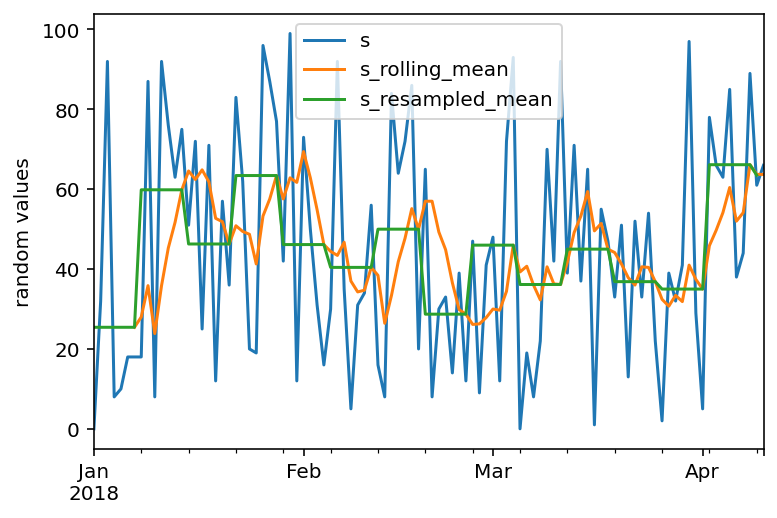

In [202]:
pl = df.plot(ylabel='random values')
pl.get_figure().savefig(r'test.pdf')

### Sparsified

In [203]:
n = np.random.rand(100)
n[n<0.9] = np.nan
s = pd.Series(n)

In [204]:
print(s.memory_usage())

928


In [205]:
n = np.random.rand(100)
n[n<0.9] = np.nan

In [206]:
s = pd.Series(pd.arrays.SparseArray(n))

In [207]:
print(s.memory_usage())

236


In [208]:
s.sparse.density

0.09

### Exercises
- https://tutswiki.com/pandas-cookbook/